In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data_loader import data_label_split
from data_loader import generate_data_set
from exp import z_score
from exp import mini_noise_signal_cv
from exp import train

from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [3]:
mini_data=pd.read_csv("mini_moa_data_drop_NA.csv", index_col=0)

In [5]:
x,y = data_label_split(mini_data)

In [7]:
x["compound"] = y

In [10]:
data_label_split(x)[0].shape

(3000, 481)

In [2]:
drop_NA_data=pd.read_csv("moa_data_drop_NA.csv", index_col=0)

# RF

In [8]:
rfc = LogisticRegression(max_iter = 10000, solver = "saga", n_jobs = -1)

In [ ]:
# full features
train(10000, drop_NA_data, rfc, 0)

In [4]:
# single feature
sf_drop_NA_data = drop_NA_data[["compound", "concentration",
                                "moa", "row ID", "Iteration (#2)", "COND",
                               "AreaShape_Area_Nuclei"]]


In [ ]:
train(10000, sf_drop_NA_data, rfc, 0)

In [4]:
result = mini_noise_signal_cv(500, mini_data, "taxol", "DMSO", clf, 10, 0)
(mean_mean_accuracy, std_mean_accuracy,
mean_pred_score_control, std_pred_score_control,
mean_pred_score_treatment, std_pred_score_treatment) = result

mean_accuracy = np.array(mean_mean_accuracy)
std_accuracy = np.array(std_mean_accuracy)
mean_pred_score_control = np.array(mean_pred_score_control)
std_pred_score_control = np.array(std_pred_score_control)
mean_pred_score_treatment = np.array(mean_pred_score_treatment)
std_pred_score_treatment = np.array(std_pred_score_treatment)
z_score = 1-3*(std_pred_score_control+std_pred_score_treatment)/(np.abs(mean_pred_score_control-mean_pred_score_treatment))

In [ ]:
classifiers = [
#     KNeighborsClassifier(30),
#     SVC(kernel="linear", C=0.025, probability = True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    MLPClassifier(alpha=1, max_iter=1000),]

for model in classifiers:
    train(10000, sf_drop_NA_data, model, 0)

  0%|          | 0/19 [00:00<?, ?it/s]/root/miniconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpc.py:432: RuntimeWarning: overflow encountered in exp
  - np.log(np.diag(L)).sum()


In [ ]:
def mini_noise_signal(size, data, treatment, control, model):
    p_acc=[]
    n_acc=[]
    for i in range(5,96,5):
        mini_batch = generate_data_set(size, i/100, data, "taxol", "DMSO")
        X, y = data_label_split(mini_batch)
        y=y['compound']
        model.fit(X, y)
        y_pred = model.predict(X)
        cm = confusion_matrix(y,y_pred)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        n_acc.append(cm.diagonal()[0])
        p_acc.append(cm.diagonal()[1])
    return p_acc, n_acc

p_acc, n_acc = mini_noise_signal(1000, drop_NA_data, "taxol", "DMSO", clf)

Text(0.5, 0, 'percent of taxol')

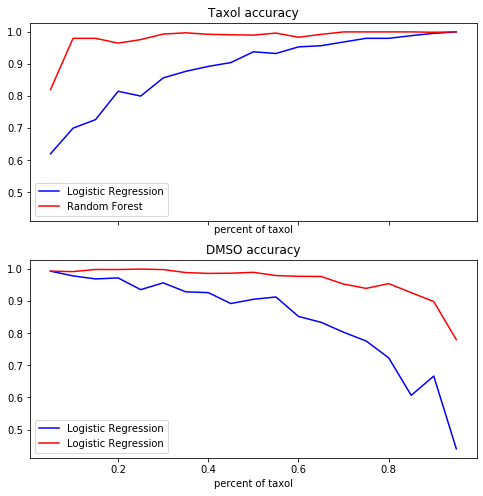

In [112]:
fig, ax = plt.subplots(2, sharex=True, sharey=True,figsize=(8, 8))
l1 = ax[0].plot([i/100 for i in range(5,96,5)], n_acc, color = 'b', label = "Logistic Regression")
l2 = ax[0].plot([i/100 for i in range(5,96,5)], n_, color = 'r', label = "Random Forest")
ax[0].legend()
ax[0].title.set_text("Taxol accuracy")
ax[0].set_xlabel('percent of taxol')
l3 = ax[1].plot([i/100 for i in range(5,96,5)], p_acc, color = 'b',label = "Logistic Regression")
l4 = ax[1].plot([i/100 for i in range(5,96,5)], p_, color = 'r',label = "Logistic Regression")
ax[1].legend()
ax[1].title.set_text("DMSO accuracy")
ax[1].set_xlabel('percent of taxol')

In [57]:
acc_gp_7 = plt.imread("./results/Accuracy_GaussianProcessClassifier_sample10000_feature7.png")
acc_knn_7 = plt.imread("./results/Accuracy_KNeighborsClassifier_sample10000_feature513.png")

In [29]:
import os

In [59]:
acc_gp_7.shape

(288, 432, 4)

In [63]:
12.19*5

60.949999999999996

In [62]:
for i in os.listdir("./results"):
    if ".png" in i:
        print(plt.imread("./results/"+i).shape)

(288, 432, 4)
(480, 640, 4)
(480, 640, 4)
(288, 432, 4)
(288, 432, 4)
(288, 432, 4)
(288, 432, 4)
(288, 432, 4)
(288, 432, 4)
(480, 640, 4)
(480, 640, 4)
(288, 432, 4)
(288, 432, 4)
(288, 432, 4)
(288, 432, 4)
(288, 432, 4)


In [58]:
np.vstack((acc_gp_7,acc_knn_7)).shape

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 432 and the array at index 1 has size 640

In [56]:
acc_gp_7.shape

(288, 432, 4)

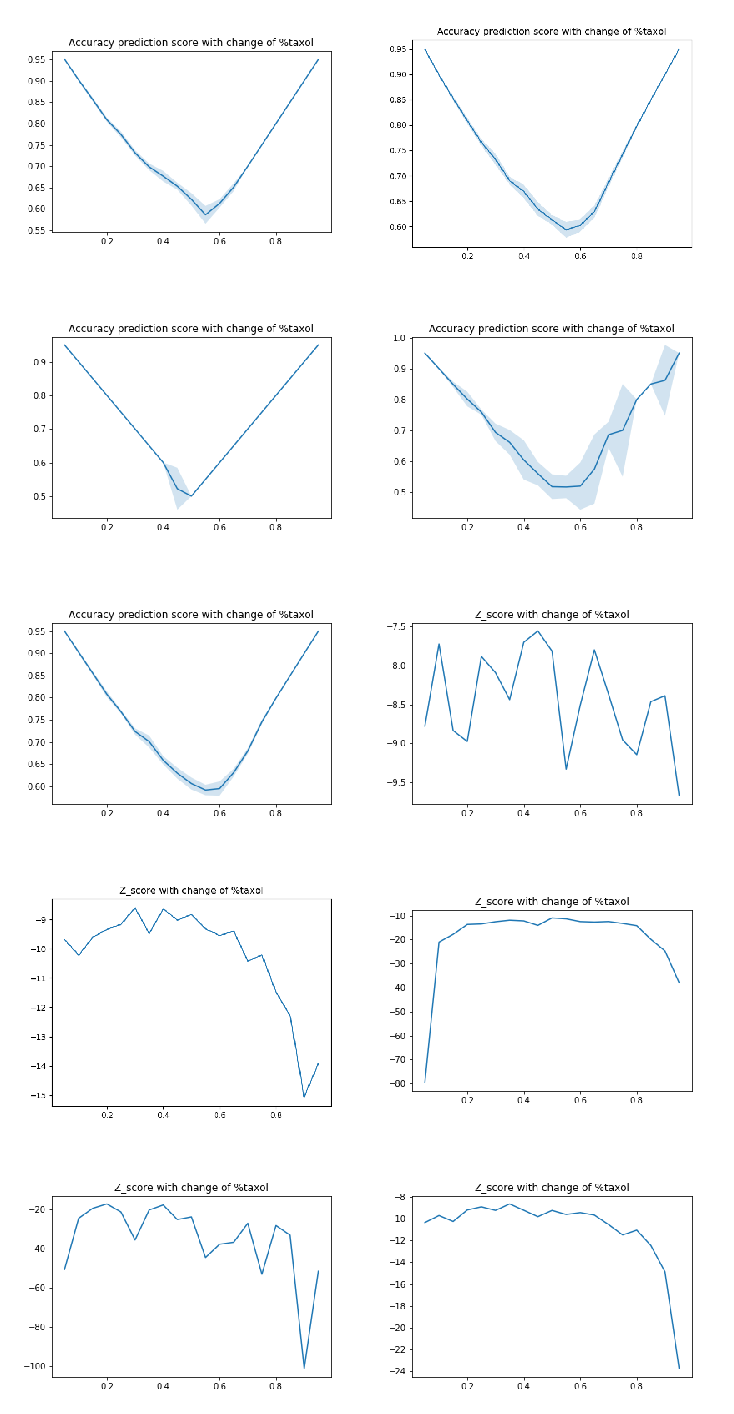

In [54]:
plt.figure(figsize=(10,20))
count = 1
for i in os.listdir("./results"):

    if str(7) in i:
        if "Accuracy" in i:
            plt.subplot(5,2,count)
            acc_7 = plt.imread("./results/"+i)
            plt.imshow(acc_7)
            plt.axis('off')
        if "Z_score" in i:
            plt.subplot(5,2,count)
            acc_7 = plt.imread("./results/"+i)
            plt.imshow(acc_7)
            plt.axis('off')
        count += 1
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
#         print(i)
#         acc_gp_7 = plt.imread(i)
#         plt.subplot(int("52%d"%count))
#         plt.imshow(acc_gp_7)
#         plt.subplot(int("52%d"%count+1))
#         plt.imshow(acc_gp_7)
#         count+=2
# plt.savefig("test.png", bbox_inches='tight')

In [25]:
for i in range(3)
plt.figure(figsize=(12,12))
plt.subplot(int("52%d"%1))
plt.imshow(acc_gp_7)
plt.subplot(int("22%d"%2))
plt.imshow(acc_gp_7)

111